# 简易NN实现性别预测

##### Copyright © 2020 by Wangchuwen，2018202114. All rights reserved.

## 一.构造神经网络

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # 权重，Weights
    self.w1 = 0.5734666654181668
    self.w2 = -0.7347844458644603
    self.w3 = 0.35871598754027156
    self.w4 = 0.17227684753124822
    self.w5 = -0.05344509263243259
    self.w6 = 1.3818657559335772

    # 截距项，Biases
    self.b1 = -0.013258754892991331
    self.b2 = -0.8288385779821897
    self.b3 = -0.5300464985969835



  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues,r,e,k):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = r
    epochs = e # number of times to loop through the entire dataset
    error=[]
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - round(y_pred))

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 1 == 0:
        #y_preds = np.rint(np.apply_along_axis(self.feedforward, 1, data))
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        #print(y_preds)
        error.append(loss)
      if(k==1):
          if epoch == e-1:
            plt.figure(figsize=(12, 6))  
            plt.plot(np.arange(0,e), error, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
            plt.title('Learning Rate=%1.3f'%learn_rate)  
            plt.xlabel('Epoch')  
            plt.ylabel('Error')  
            plt.show()

  def predict(self,X):
        #y_pre = np.rint(np.apply_along_axis(self.feedforward, 1, X))
        y_pre = np.apply_along_axis(self.feedforward, 1, X)
        return y_pre   
        

    


## 二.装载数据集

In [2]:
url='classdata.csv'
dataframe=pd.read_csv(url)

## 三.数据预处理

In [3]:
def judge(x):
    if '男' == x:
        return 1
    elif '女'== x:
        return 0
dataframe['MW'] = dataframe.S.apply(lambda x: judge(x))

## 四.分割训练集和测试集

In [4]:
data=dataframe.values
X=data[:,1:3]
Y=data[:,4]
X_train=np.array(X)[1::2,].astype(float)
X_test=np.array(X)[0::2,].astype(float)
Y_train=np.array(Y)[1::2,].astype(float)
Y_test=np.array(Y)[0::2,].astype(float)

X_train= normalize(X_train, axis=0, norm='max')
#X_train[:,1]=X_train[:,1]
#X_train[:,0]=X_train[:,0]

X_test= normalize(X_test, axis=0, norm='max')
#X_test[:,1]=X_test[:,1]
#X_train[:,0]=X_train[:,0]



## 五.训练神经网络并输出损失收敛图

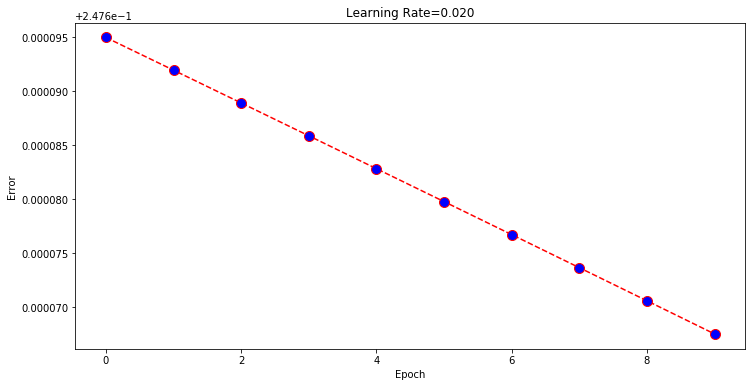

In [5]:
# Train our neural network!
network = OurNeuralNetwork()
network.train(X_train,Y_train,0.02,10,1)



## 六.测试集上的分类效果

预测值为：
[0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
真实值为：
[0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]


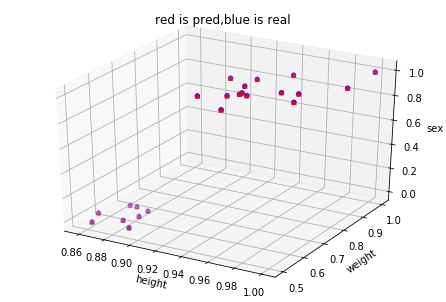

In [6]:

Y_pred=network.predict(X_test)

fig=plt.figure()
ax1 = Axes3D(fig)
z = np.array(Y_test).astype(float)
zp = np.rint(np.array(Y_pred).astype(float))
x = np.array(X_test[:,0]).astype(float)
y = np.array(X_test[:,1]).astype(float)
print('预测值为：')
print(zp)
print('真实值为：')
print(z)
ax1.scatter3D(x,y,z,c='b')  #真实值
ax1.scatter3D(x,y,zp,c='r',marker = '^')  #预测值

ax1.set_xlabel('height')
ax1.set_ylabel('weight')
ax1.set_zlabel('sex')
ax1.set_title("red is pred,blue is real")
plt.show()

